In [1]:
import numpy as np
import pandas as pd
import math
from pprint import pprint
import matplotlib.pyplot as plt 
from annfuncs import *

from sklearn.model_selection import train_test_split

In [2]:
df=pd.read_csv("CCPP\Folds5x2_pp - Sheet1.csv") 
# df1=pd.read_csv("CCPP\Folds5x2_pp - Sheet2.csv") 
# df2=pd.read_csv("CCPP\Folds5x2_pp - Sheet3.csv") 
# df3=pd.read_csv("CCPP\Folds5x2_pp - Sheet4.csv") 
# df4=pd.read_csv("CCPP\Folds5x2_pp - Sheet5.csv") 

# df=df.append(df1,ignore_index=True)
# df=df.append(df2,ignore_index=True)
# df=df.append(df3,ignore_index=True)
# df=df.append(df4,ignore_index=True)




In [3]:
df

,AT,V,AP,RH,PE
0,14.96,41.76,1024.07,73.17,463.26
1,25.18,62.96,1020.04,59.08,444.37
2,5.11,39.40,1012.16,92.14,488.56
3,20.86,57.32,1010.24,76.64,446.48
4,10.82,37.50,1009.23,96.62,473.90
...,...,...,...,...,...
9563,16.65,49.69,1014.01,91.00,460.03
9564,13.19,39.18,1023.67,66.78,469.62
9565,31.32,74.33,1012.92,36.48,429.57
9566,24.48,69.45,1013.86,62.39,435.74


In [4]:
def normalise(df):
    maxes=[]
    mins=[]
    for c in df.columns:
        maxes.append(df[c].max())
        mins.append(df[c].min())
    count=0
    for c in df.columns:
        df[c]=(2*df[c]-(maxes[count]+mins[count]))/(maxes[count]-mins[count])
#         df[c]=(df[c]-(mins[count]))/(maxes[count]-mins[count])

        count=count+1
    print(mins)
    print(maxes)
#     print(df)

In [5]:
normalise(df)
y=np.array(df['PE'].values)
df.drop(['PE'], axis=1,inplace=True)
x=np.array(df.values)

[1.81, 25.36, 992.89, 25.56, 420.26]
[37.11, 81.56, 1033.3, 100.16, 495.76]


In [6]:
pprint(x)
pprint(y)


array([[-0.25495751, -0.41637011,  0.54318238,  0.27640751],
       [ 0.32407932,  0.33807829,  0.3437268 , -0.10134048],
       [-0.81303116, -0.50035587, -0.04627567,  0.7849866 ],
       ...,
       [ 0.67195467,  0.74270463, -0.00866122, -0.70723861],
       [ 0.28441926,  0.56903915,  0.03786192, -0.01260054],
       [ 0.12124646,  0.32241993,  0.20465231,  0.13431635]])
array([ 0.13907285, -0.3613245 ,  0.80927152, ..., -0.75337748,
       -0.58993377, -0.12529801])


In [7]:
X_train1, X_test, y_train1, y_test = train_test_split(x, y, test_size=0.1)
X_train, X_valid, y_train, y_valid = train_test_split(X_train1, y_train1, test_size=0.2)
X_train=X_train.reshape(X_train.shape[1],X_train.shape[0])
y_train=y_train.reshape(1,y_train.shape[0])
X_valid=X_valid.reshape(X_valid.shape[1],X_valid.shape[0])
y_valid=y_valid.reshape(1,y_valid.shape[0])
X_test=X_test.reshape(X_test.shape[1],X_test.shape[0])
y_test=y_test.reshape(1,y_test.shape[0])
# print(X_train.shape[1])
print (X_train.shape, y_train.shape)
print (X_valid.shape, y_valid.shape)
print(X_test.shape, y_test.shape)


(4, 6888) (1, 6888)
(4, 1723) (1, 1723)
(4, 957) (1, 957)


In [8]:

print(y_valid)
print(y_train)

[[-0.70543046 -0.44317881 -0.18013245 ... -0.00715232 -0.25218543
  -0.57907285]]
[[ 0.84635762 -0.25324503  0.30675497 ... -0.41668874 -0.55152318
   0.32317881]]


In [9]:
# layers_dims = [4,30,15,5,1]
# # layers_dims = [4,1,30,10,1]
# parameters = L_layer_model(X_train, y_train, layers_dims, num_iterations = 5000,learning_rate = 0.01, print_cost = True,
#                            lambd=0.1,optimizer="adam", beta = 0.9,beta1 = 0.9, beta2 = 0.999,regularisation='L2',  epsilon = 1e-8,activation='tanh')

Cost after epoch 0: 0.217024  0.222671
Cost after epoch 1: 0.209270  0.222555
Cost after epoch 2: 0.207352  0.216394
Cost after epoch 3: 0.206544  0.212505
Cost after epoch 4: 0.205363  0.213463
Cost after epoch 5: 0.204793  0.215989
Cost after epoch 6: 0.204421  0.218215
Cost after epoch 7: 0.203620  0.217428
Cost after epoch 8: 0.203671  0.213831
Cost after epoch 9: 0.202918  0.216123


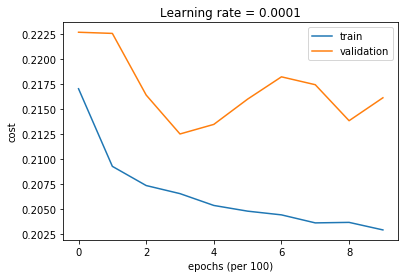

In [37]:
layers_dims = [4,100,100,1]
# layers_dims = [4,80,60,40,1]
# layers_dims = [4,1,30,20,1]
parameters = L_layer_model_minib(X_train, y_train,layers_dims,valid=True,valid_x=X_valid,valid_y=y_valid,num_iterations = 10,
                                 mini_batch_size = 1,learning_rate = 0.0001, print_cost = True,regularisation='none',lambd=0.1,
                    optimizer="adam", beta = 0.9,beta1 = 0.9, beta2 = 0.999,epsilon = 1e-8,activation='tanh',cost_func='mse')

In [38]:
reg="none"
act="tanh"
mape=predicterr(X_train,y_train,parameters,lambd=0.1,activation=act,regularisation=reg,cost_func="mape")
print(mape)

mape=predicterr(X_valid,y_valid,parameters,lambd=0.1,activation=act,regularisation=reg,cost_func="mape")
print(mape)

mape=predicterr(X_test,y_test,parameters,lambd=0.1,activation=act,regularisation=reg,cost_func="mape")
print(mape)

168.35522736121914
188.789909242976
214.45220412275395


In [39]:
pred_train = predictvals(X_train, parameters,activation='tanh')


In [40]:
for i in range(0,10):
    print(pred_train[0][i])
print("y vals")
for i in range(0,10):
    print(y_train[0][i])
print(pred_train.shape)
print(X_train.shape)

-0.10772819284749686
-0.18281894037541951
-0.06372284830672491
-0.11562616523530463
0.018413664935426604
0.04117873502581871
-0.16235551657506647
-0.1566783164414471
-0.11161937114768955
-0.17206694973523173
y vals
0.8463576158940395
-0.25324503311258284
0.3067549668874168
-0.5727152317880796
0.5162913907284771
0.06410596026490109
-0.03629139072847694
0.18754966887417177
-0.6468874172185435
-0.6656953642384105
(1, 6888)
(4, 6888)


In [41]:
# valid_err=predicterr(X_train,y_train,parameters,lambd=0.1,activation='sigmoid',regularisation='L2',cost_func='log')
valid_err=predicterr(X_train,y_train,parameters,lambd=0.1,activation='tanh',regularisation='L2',cost_func="mse")

In [42]:
print(valid_err)

0.20532292775133607


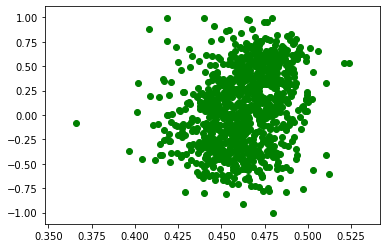

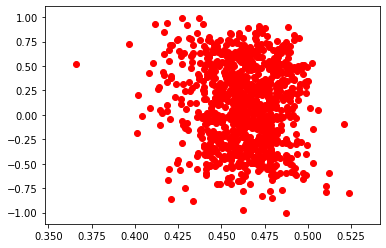

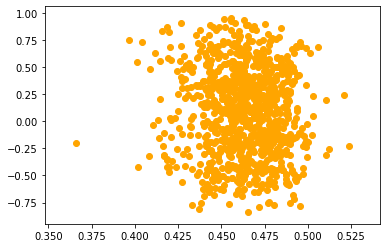

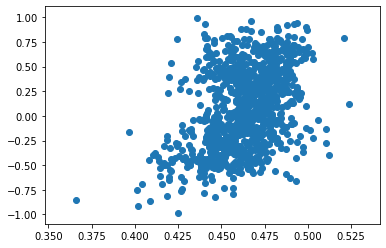

In [43]:
pred_test= predictvals(X_test, parameters,activation='sigmoid')
plt.scatter(pred_test,X_test[0],color='green')
plt.show()
plt.scatter(pred_test,X_test[1],color='red')
plt.show()

plt.scatter(pred_test,X_test[2],color='orange')
plt.show()

plt.scatter(pred_test,X_test[3])

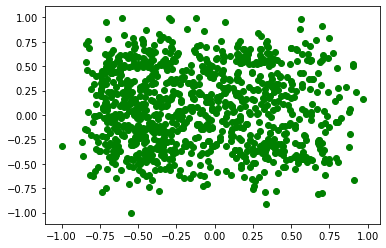

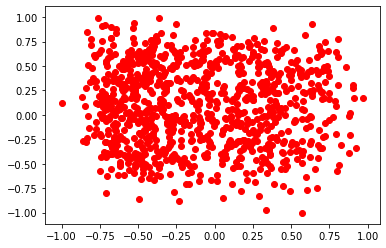

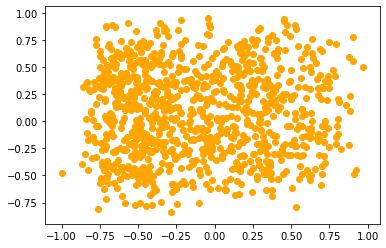

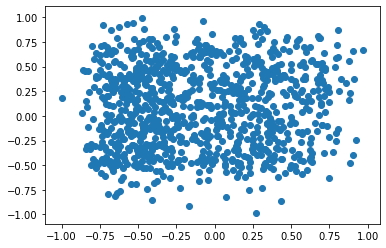

In [44]:
# pred_test= predictvals(X_test, parameters,activation='sigmoid')
plt.scatter(y_test,X_test[0],color='green')
plt.show()
plt.scatter(y_test,X_test[1],color='red')
plt.show()

plt.scatter(y_test,X_test[2],color='orange')
plt.show()

plt.scatter(y_test,X_test[3])

In [45]:
X_test

array([[ 0.57223796, -0.07224199, -0.35758476, ..., -0.11061618,
         0.53458445,  0.15410765],
       [ 0.21103203,  0.08537491,  0.60187668, ..., -0.4233244 ,
        -0.60679887, -0.61067616],
       [ 0.12447414, -0.14289544, -0.04985836, ..., -0.16147309,
        -0.27010676, -0.18584509],
       [ 0.94021448, -0.17110482, -0.33807829, ..., -0.0252669 ,
         0.5545657 , -0.12117962]])